In [298]:
import pandas as pd
import networkx as nx
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline
pos = nx.circular_layout(DG)
from matplotlib.patches import Ellipse

In [318]:
datos_nodo=pd.read_csv("metro.csv")
datos_nodo.head()

,id,estacion
0,1,Observatorio
1,T197,Tacubaya
2,3,Juanacatlán
3,4,Chapultepec
4,5,Sevilla


In [319]:
datos_nodo.set_index("id",inplace=True)
datos_nodo.head()

,estacion
id,
1,Observatorio
T197,Tacubaya
3,Juanacatlán
4,Chapultepec
5,Sevilla


In [320]:
rutas_nodo=pd.read_csv('resultado.csv')
rutas_nodo.head()


,origen,destino,peso
0,1,T197,1
1,T197,1,1
2,T197,3,1
3,3,T197,1
4,3,4,1


In [347]:
DG=nx.DiGraph()
for filas in rutas_nodo.iterrows():
    DG.add_edge(filas[1]["origen"],
                filas[1]["destino"],
                peso=filas[1]["peso"])
DG.nodes(data=True)

NodeDataView({'1': {}, 'T197': {}, '3': {}, '4': {}, '5': {}, '6': {}, '7': {}, 'T13': {}, 'T18': {}, '10': {}, 'T12': {}, '12': {}, 'T14': {}, 'T1B': {}, '15': {}, '16': {}, '17': {}, '18': {}, '19': {}, 'T159A': {}, '21': {}, '22': {}, 'T27': {}, '24': {}, '25': {}, '26': {}, '27': {}, '28': {}, '29': {}, 'T23': {}, 'T28': {}, '32': {}, '33': {}, '35': {}, 'T289': {}, '37': {}, '38': {}, '39': {}, '40': {}, '41': {}, 'T212': {}, '43': {}, '44': {}, '45': {}, 'T36': {}, '47': {}, 'T35': {}, '49': {}, 'T3B': {}, '52': {}, '54': {}, '55': {}, 'T39': {}, '57': {}, '58': {}, '59': {}, 'T312': {}, '61': {}, '62': {}, '63': {}, '64': {}, '65': {}, 'T46': {}, '66': {}, '68': {}, 'T45': {}, '70': {}, 'T4B': {}, '73': {}, 'T49': {}, 'T48': {}, '77': {}, '78': {}, 'T5B': {}, '80': {}, '81': {}, '83': {}, '84': {}, '86': {}, 'T63': {}, '88': {}, 'T67': {}, '90': {}, '91': {}, '92': {}, '93': {}, '94': {}, '96': {}, '98': {}, '101': {}, '102': {}, '103': {}, '105': {}, '106': {}, '107': {}, '108'

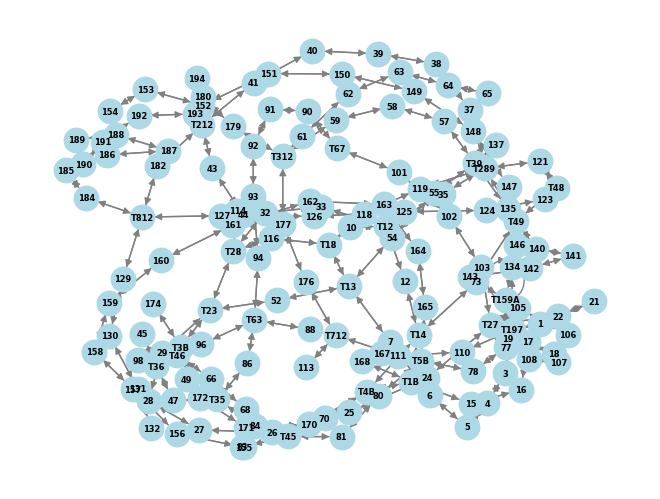

In [390]:
pos = nx.spring_layout(DG, k=1.6, iterations=500, scale=15, center=(1, 1), seed=70)
  # Calcula la disposición de los nodos
  # Obtiene los atributos de peso de las aristas

nx.draw(DG, pos, with_labels=True, node_size=310, node_color='lightblue', font_size=6, font_color='black',edge_color='gray', font_weight='bold')

plt.show()

In [323]:
color_mapping = {node: 'pink' if node.isdigit() and 1 <= int(node) <= 20 else 'lightblue'
                 for node in DG.nodes()}

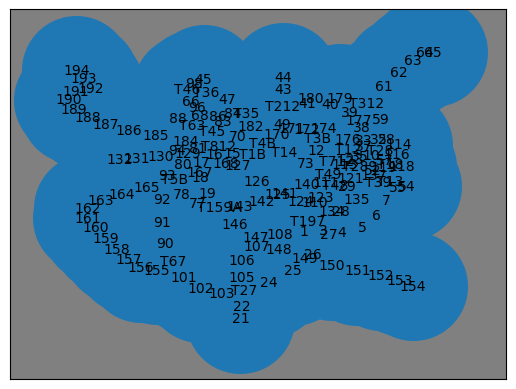

In [346]:
nx.draw_networkx(DG,
                edge_color='gray',
                font_size=10,
                width=122,
                with_labels=True,
                node_size=6000)

In [328]:
list(nx.all_shortest_paths(DG,source="1",target="T159A",weight=None))

[['1',
  'T197',
  '134',
  '135',
  'T39',
  '137',
  'T289',
  'T49',
  '140',
  '141',
  '142',
  '143',
  'T159A']]

In [333]:
list(nx.dijkstra_path(DG,source="1",target="194",weight=None))

['1',
 'T197',
 '110',
 '111',
 'T712',
 '176',
 '177',
 'T312',
 '179',
 '180',
 'T212',
 '182',
 'T812',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '190',
 '191',
 '192',
 '193',
 '194']

In [334]:
list(nx.dijkstra_path(DG,source="1",target="194",weight="peso"))

['1',
 'T197',
 '110',
 '111',
 'T712',
 '176',
 '177',
 'T312',
 '179',
 '180',
 'T212',
 '182',
 'T812',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '190',
 '191',
 '192',
 '193',
 '194']

In [332]:
datos_nodo.loc["24"]["estacion"]

' Cuitláhuac'

In [200]:
def ruta(ruta):
    total_peso=0
    for i in range(len(ruta)-1):
        origen=ruta[i]
        destino=ruta[i+1]
        peso=DG[origen][destino]["peso"]
        total_peso=total_peso+peso
        print(" %s->%s\n Peso: %s " % 
              (datos_nodo.loc[origen]['estacion'],
               datos_nodo.loc[destino]['estacion'],peso))
    print("\n Peso total=%s"%(total_peso))

In [335]:
ruta(['1',
 'T197',
 '110',
 '111',
 'T712',
 '176',
 '177',
 'T312',
 '179',
 '180',
 'T212',
 '182',
 'T812',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '190',
 '191',
 '192',
 '193',
 '194'])

  Observatorio-> Tacubaya
 Peso: 1 
  Tacubaya-> San Pedro de los Pinos
 Peso: 1 
  San Pedro de los Pinos-> San Antonio
 Peso: 1 
  San Antonio-> Mixcoac
 Peso: 1 
  Mixcoac-> Insurgentes Sur
 Peso: 1 
  Insurgentes Sur-> Hospital 20 de Noviembre
 Peso: 1 
  Hospital 20 de Noviembre-> Zapata
 Peso: 1 
  Zapata-> Parque de los Venados
 Peso: 1 
  Parque de los Venados-> Eje Central
 Peso: 1 
  Eje Central-> Ermita
 Peso: 1 
  Ermita-> Mexicaltzingo
 Peso: 1 
  Mexicaltzingo-> Atlalilco
 Peso: 1 
  Atlalilco-> Culhuacán
 Peso: 1 
  Culhuacán-> San Andrés Tomatlán
 Peso: 1 
  San Andrés Tomatlán-> Lomas Estrella
 Peso: 1 
  Lomas Estrella-> Calle 11
 Peso: 1 
  Calle 11-> Periférico Oriente
 Peso: 1 
  Periférico Oriente-> Tezonco
 Peso: 1 
  Tezonco-> Olivos
 Peso: 1 
  Olivos-> Nopalera
 Peso: 1 
  Nopalera-> Zapotitlán
 Peso: 1 
  Zapotitlán-> Tlaltenco
 Peso: 1 
  Tlaltenco-> Tláhuac
 Peso: 1 

 Peso total=23
